# Umoja Hackathon Nigeria

# Financial Resilience Challenge

In [7]:
import numpy as np
import pandas as pd
import datetime,time
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report,roc_auc_score,average_precision_score

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
train=pd.read_csv('/storage/emulated/0/Download/Umojahackathon/train.csv',index_col=False)
test=pd.read_csv('/storage/emulated/0/Download/Umojahackathon/test.csv',index_col=False)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12079 non-null  object
 1   Policy Start Date       12079 non-null  object
 2   Policy End Date         12079 non-null  object
 3   Gender                  11720 non-null  object
 4   Age                     12079 non-null  int64 
 5   First Transaction Date  12079 non-null  object
 6   No_Pol                  12079 non-null  int64 
 7   Car_Category            8341 non-null   object
 8   Subject_Car_Colour      5117 non-null   object
 9   Subject_Car_Make        9603 non-null   object
 10  LGA_Name                5603 non-null   object
 11  State                   5591 non-null   object
 12  ProductName             12079 non-null  object
 13  target                  12079 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 802.2+ KB


In [11]:
train.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


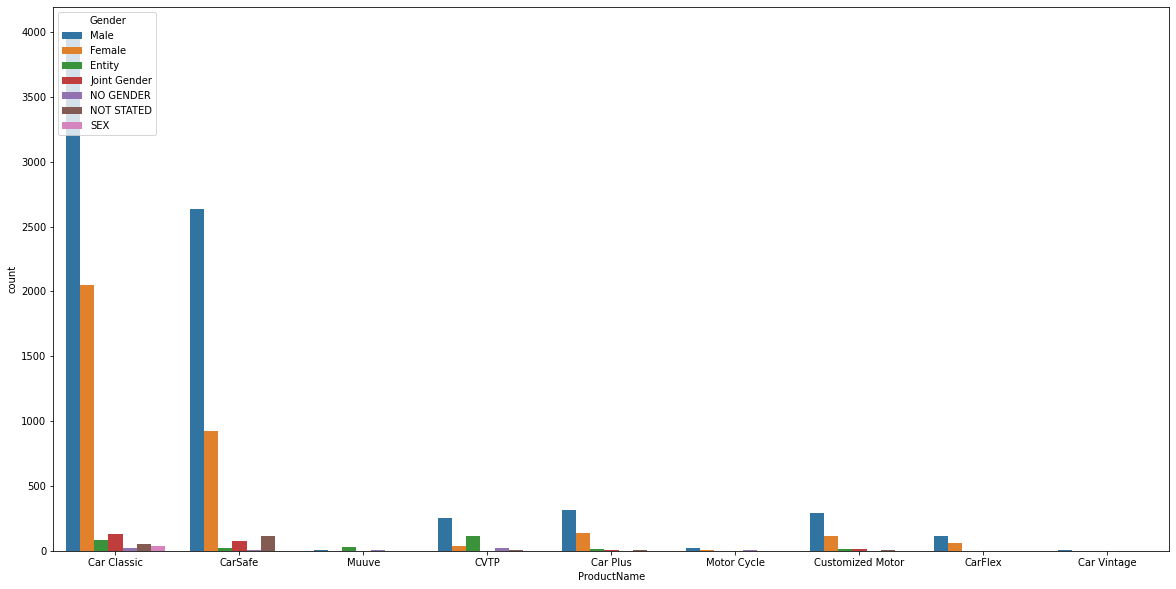

In [12]:
fig,ax=plt.subplots(figsize=(20,10))
sns.countplot(x='ProductName',hue='Gender',data=train)

Classical and CarSafe cars were majrly bought by Men and the large population of women purchased CarSafe cars 

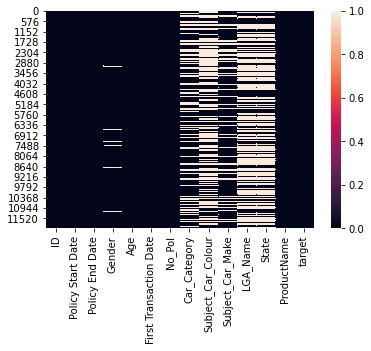

In [13]:
sns.heatmap(train.isnull())

In [14]:
train.isnull().sum()

ID                           0
Policy Start Date            0
Policy End Date              0
Gender                     359
Age                          0
First Transaction Date       0
No_Pol                       0
Car_Category              3738
Subject_Car_Colour        6962
Subject_Car_Make          2476
LGA_Name                  6476
State                     6488
ProductName                  0
target                       0
dtype: int64

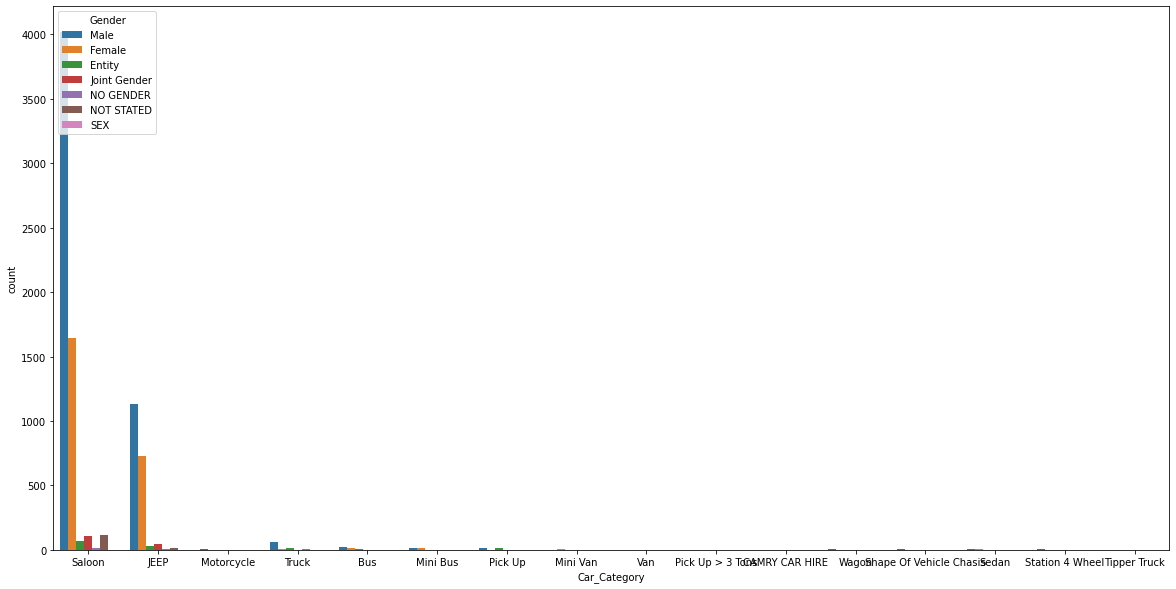

In [15]:
fig,ax=plt.subplots(figsize=(20,10))
sns.countplot(x='Car_Category',hue='Gender',data=train)

In [ ]:
sns.catplot(x='Car_Category',y='Age',kind='swarm',data=train)

In [ ]:
test.info()

In [ ]:
#Data Extraction
df=train.copy()
o_t=train.copy().values
target=train.target.values
train.drop('target',axis=1,inplace=True)
test_id=test['ID']
data=pd.concat([train,test],axis=0).drop('ID',axis=1)

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
feat=data.columns
feat

In [ ]:
#Handling Bigger Categorical Variables
cat_var=['State','Subject_Car_Colour','Subject_Car_Make','LGA_Name']
for i in cat_var:
    print(data[i].value_counts())
    list=data[i].value_counts().to_dict()
    data[i]=data[i].map(list)
    data[i]=data[i]/len(data[i])

In [ ]:
#One hot encoding
gender_dummies=pd.get_dummies(data['Gender']).add_prefix('Gender_')
data=pd.concat([data,gender_dummies],axis=1).drop('Gender',axis=1)

p_name_dummies=pd.get_dummies(data['ProductName']).add_prefix('ProductName_')
data=pd.concat([data,p_name_dummies],axis=1).drop('ProductName',axis=1)

car_cat_dummies=pd.get_dummies(data['Car_Category']).add_prefix('Car Category_')
data=pd.concat([data,car_cat_dummies],axis=1).drop('Car_Category',axis=1)

In [ ]:
data.info()

In [ ]:
#Datetime Features
date_var=['First Transaction Date','Policy Start Date','Policy End Date']
for i in date_var:
	data[i]=pd.to_datetime(data[i])
	
data['Number Of Policy Date']=data['Policy End Date']-data['Policy Start Date']
data['Number Of Policy Date']=data['Number Of Policy Date'].dt.days.astype('int16')

data['First Transaction Date'+'Year']=data['First Transaction Date'].dt.year
data['First Transaction Date'+'Month']=data['First Transaction Date'].dt.month
data['First Transaction Date'+'Day']=data['First Transaction Date'].dt.day

data.drop(['First Transaction Date','Policy Start Date','Policy End Date'],axis=1,inplace=True)

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
data['No_Pol'].unique()

In [ ]:
data.loc[data['Age']<0,'Age']=0
data.loc[data['Age']>200,'Age']=0

data['Age'].unique()

In [ ]:
new_col=data.columns
imp=SimpleImputer(strategy='mean')
data=data.values
X=imp.fit_transform(data)

data=pd.DataFrame(X,columns=new_col)

for col in new_col:
    print(data[col].value_counts())

In [ ]:
#Handling Age Binning
print(data.Age.unique());print()
bins=[0,25,50,75,150]
which_bin=np.digitize(data.Age,bins)
cat=pd.cut(data['Age'],bins)
print(which_bin[:10]);print()
print(pd.value_counts(cat));print()
data['Age']=which_bin
data['Age'].unique()

In [ ]:
#Handling Pol Binning
print(data.No_Pol.unique());print()
bin2=[0,3,7,11]
which_bin2=np.digitize(data.No_Pol,bin2)
cat2=pd.cut(data['No_Pol'],bin2)
print(which_bin2[:10]);print()
print(pd.value_counts(cat2));print()
data['No_Pol']=which_bin2
print(data['No_Pol'].unique())

In [ ]:
data.info()

In [ ]:
data.tail()

In [ ]:
train=data[:o_t.shape[0]]
test=data[o_t.shape[0]:]

X_train,X_test,y_train,y_test=train_test_split(train,target,random_state=16,test_size=0.25)

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=16)

In [ ]:
pipe_lr=Pipeline([('scaler',StandardScaler()),('lr',LogisticRegression(max_iter=10000,C=150))])
pipe_svm=Pipeline([('scaler',StandardScaler()),('svm',SVC(C=30,kernel='linear',gamma=0.5))])
pipe_nn=Pipeline([('scaler',StandardScaler()),('nn',MLPClassifier(max_iter=10000,alpha=0.1,random_state=16))])
pipe_dt=Pipeline([('dt',DecisionTreeClassifier(random_state=16,max_depth=7))])
pipe_ad=Pipeline([('ad',AdaBoostClassifier(DecisionTreeClassifier(max_depth=7),random_state=16,learning_rate=0.8,n_estimators=320))])
pipe_rf=Pipeline([('rf',RandomForestClassifier(random_state=16,max_depth=7,n_estimators=200))])
pipe_gb=Pipeline([('gb',GradientBoostingClassifier(random_state=16,max_depth=7,n_estimators=200,learning_rate=0.6))])

## Oversampling

In [ ]:
train=pd.concat([train,df.target],axis=1)

count_class_0,count_class_1=train.target.value_counts()
df_class_0=train[train['target']==0]
df_class_1=train[train['target']==1]
df_class_1_over=df_class_1.sample(count_class_0,replace=True)
df_over=pd.concat([df_class_1_over,df_class_0],axis=0)

print('Majority Class Shape:{}'.format(df_class_0.shape))
print('Minority Class Shape:{}'.format(df_class_1.shape))
print('Minority Class Shape After Oversampling:{}'.format(df_class_1_over.shape))

## Data Segregation

In [ ]:
X=df_over.drop('target',axis=1)
y=df_over.target

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=16,stratify=y)

## Pipeline Generation

In [ ]:
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=16)
pipe_lr=Pipeline([('scaler',StandardScaler()),('lr',LogisticRegression(max_iter=10000,C=150))])
pipe_svm=Pipeline([('scaler',StandardScaler()),('svm',SVC(C=100,kernel='rbf',gamma=10))])
pipe_nn=Pipeline([('scaler',StandardScaler()),('nn',MLPClassifier(max_iter=10000,alpha=0.1,random_state=16))])
pipe_dt=Pipeline([('dt',DecisionTreeClassifier(random_state=16,max_depth=7))])
pipe_ad=Pipeline([('ad',AdaBoostClassifier(DecisionTreeClassifier(max_depth=7),random_state=16,learning_rate=0.8,n_estimators=320))])
pipe_rf=Pipeline([('rf',RandomForestClassifier(random_state=16,max_depth=7,n_estimators=200))])
pipe_gb=Pipeline([('gb',GradientBoostingClassifier(random_state=16,max_depth=7,n_estimators=200,learning_rate=0.6))])

## Algorithm Functions

In [ ]:
def MBU(model_name,model,predict_name):
    print(model_name)
    model.fit(X_train,y_train)
    predict_name=model.predict(X_test)
    train_score=model.score(X_train,y_train)
    test_score=model.score(X_test,y_test)
    con_mat=confusion_matrix(y_test,predict_name)
    class_rep=classification_report(y_test,predict_name)

    return model,predict_name,train_score,test_score,con_mat,class_rep

def print_stat(train_score,test_score,con_mat,class_rep):
    print('Train set score:{:.3f}'.format(train_score))
    print('Test set score:{:.3f}'.format(test_score));print()
    print('Confusion Matrix\n{}'.format(con_mat))
    print('Classification Report\n{}'.format(class_rep))

def cross_valid(model,scoring,model_name,train,target):
    print('CROSS VALIDATIONS ON\t'+model_name)
    score=cross_val_score(model,train,target,scoring=scoring,cv=kfold)
    print('Cross Validation Scores:{}'.format(score));print()
    print('Cross Validation Scores:{:.3f}'.format(score.mean()))

In [ ]:
model_lr,predict_name,train_score,test_score,con_mat,class_rep=MBU('LogisticRegression',pipe_lr,'pred_lr')
print_stat(train_score,test_score,con_mat,class_rep)

model_svm,predict_name,train_score,test_score,con_mat,class_rep=MBU('Support Vector Mechanism',pipe_svm,'pred_svm')
print_stat(train_score,test_score,con_mat,class_rep)

model_nn,predict_name,train_score,test_score,con_mat,class_rep=MBU('Neural Network',pipe_nn,'pred_nn')
print_stat(train_score,test_score,con_mat,class_rep)

model_dt,predict_name,train_score,test_score,con_mat,class_rep=MBU('Decision Tree',pipe_dt,'pred_dt')
print_stat(train_score,test_score,con_mat,class_rep)

model_ad,predict_name,train_score,test_score,con_mat,class_rep=MBU('AdaBoost',pipe_ad,'pred_ad')
print_stat(train_score,test_score,con_mat,class_rep)

model_rf,predict_name,train_score,test_score,con_mat,class_rep=MBU('RandomForest',pipe_rf,'pred_rf')
print_stat(train_score,test_score,con_mat,class_rep)

model_gb,predict_name,train_score,test_score,con_mat,class_rep=MBU('GradientBoosting',pipe_gb,'pred_gb')
print_stat(train_score,test_score,con_mat,class_rep)